<a href="https://colab.research.google.com/github/Darshan-Paradox/TRINITLiliputsML01/blob/main/generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
##connecting gdrive and colab for dataset
drive.mount("/content/gdrive")
%cd gdrive/MyDrive/NIT\ Trichy

Mounted at /content/gdrive
/content/gdrive/MyDrive/NIT Trichy


In [ ]:
##pip installations
!pip install librosa
!pip install -U encodec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 4.6 MB/s eta 0:00:00
  Created wheel for encodec: filename=encodec-0.1.1-py3-none-any.whl size=45779 sha256=4161f926467d52ee3a0d7f2bb5213338c52233bc572ddd473e535c5c3ac0787b
  Stored in directory: /root/.cache/pip/wheels/83/ca/c5/2770ecff40c79307803c30f8d4c5dcb533722f5f7c049ee9db
Successfully built encodec


In [ ]:
#libraries for io and visual representation
import numpy as np
import librosa as ll
from IPython.display import Audio
from matplotlib import pyplot as plt

#libraries required by Encodec Model
import torch
import torchaudio

#Encodec Model
from encodec import EncodecModel
from encodec.utils import convert_audio

In [ ]:
audio, sr = ll.load("./cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925868.mp3")
Audio(data=audio, rate=sr)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
model = EncodecModel.encodec_model_24khz()
model.set_target_bandwidth(6.0)

Downloading: "https://dl.fbaipublicfiles.com/encodec/v0/encodec_24khz-d7cc33bc.th" to /root/.cache/torch/hub/checkpoints/encodec_24khz-d7cc33bc.th


  0%|          | 0.00/88.9M [00:00<?, ?B/s]

In [ ]:
wav, sr = torchaudio.load("./cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925868.mp3")
wav = convert_audio(wav, sr, model.sample_rate, model.channels)
wav = wav.unsqueeze(0)

torch.Size([8, 441])

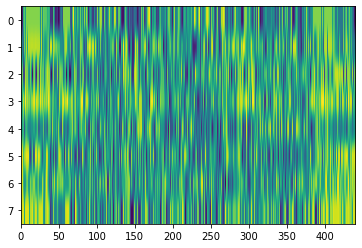

In [ ]:
with torch.no_grad():
    encoded_frames = model.encode(wav)

codes = torch.cat([encoded[0] for encoded in encoded_frames], dim=-1)
plt.imshow(codes[0], aspect="auto")
codes[0].size()